In [23]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score
df=pd.read_csv("newprojectchurn7.csv")
# 1. KAYDEDİLEN MODELİ YÜKLE
with open('random_forest_churn_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

rf_model = model_info['model']
features = model_info['features']

print("✅ Model başarıyla yüklendi!")
print(f"📊 Model: {model_info['model_name']}")
print(f"📊 Test AUC: {model_info['performance']['test_auc']:.4f}")
print(f"📊 Test Accuracy: {model_info['performance']['test_acc']:.4f}")
print(f"📊 Feature Sayısı: {len(features)}")

# 2. DAHA GERÇEKÇİ ÖRNEK MÜŞTERİ PROFİLLERİ
sample_customers = [
    # 🟢 DÜŞÜK CHURN RİSKLİ (LOYAL MÜŞTERİ) - DAHA GERÇEKÇİ
    {
        'cart_abandon_rate': 0.5,
        'time_since_last_purchase': 120,
        'return_rate': 0.0,
        'bounce_rate': 0.3,
        'avg_response_time_to_tickets': 3.5,
        'avg_time_between_sessions': 2.1,
        'TimeSinceLastLogin': 1,
        'support_ticket_count_last_90_days': 2,
        'FirstResponseTime': 2.5,
        'ReopenCount': 0,
        'avg_customer_service_rating': 3,
        'CSAT_Score': 4.0,
        'SessionDuration': 4.0,
        'avg_session_duration': 4.0,
        'site_visit_count_last_7_days': 1,
        'AverageOrderValue': 100.0,
        'total_purchase_count': 3,
        'avg_purchase_value': 200.0,
        'TotalSpend': 1000.0,
        'NPS_Score': 4
    },
    
    # 🟡 ORTA CHURN RİSKLİ (KARARSIZ MÜŞTERİ) - DAHA GERÇEKÇİ
    {
        'cart_abandon_rate': 0.38,
        'time_since_last_purchase': 32,
        'return_rate': 0.10,
        'bounce_rate': 0.52,
        'avg_response_time_to_tickets': 9.8,
        'avg_time_between_sessions': 7.3,
        'TimeSinceLastLogin': 18,
        'support_ticket_count_last_90_days': 4,
        'FirstResponseTime': 8.1,
        'ReopenCount': 2,
        'avg_customer_service_rating': 3.1,
        'CSAT_Score': 3.3,
        'SessionDuration': 4,
        'avg_session_duration': 4,
        'site_visit_count_last_7_days': 6,
        'AverageOrderValue': 135.0,
        'total_purchase_count': 10,
        'avg_purchase_value': 125.0,
        'TotalSpend': 1575.0,
        'NPS_Score': 5
    },
    
    # 🟠 YÜKSEK-ORTA RİSK (AYRILMA RİSKİ) - DAHA GERÇEKÇİ
    {
        'cart_abandon_rate': 0.58,
        'time_since_last_purchase': 48,
        'return_rate': 0.25,
        'bounce_rate': 0.68,
        'avg_response_time_to_tickets': 16.2,
        'avg_time_between_sessions': 12.7,
        'TimeSinceLastLogin': 32,
        'support_ticket_count_last_90_days': 6,
        'FirstResponseTime': 14.3,
        'ReopenCount': 3,
        'avg_customer_service_rating': 2.4,
        'CSAT_Score': 2.6,
        'SessionDuration': 3.2,
        'avg_session_duration': 2.8,
        'site_visit_count_last_7_days': 3,
        'AverageOrderValue': 95.0,
        'total_purchase_count': 9,
        'avg_purchase_value': 88.0,
        'TotalSpend': 600.0,
        'NPS_Score': 3
    },
    
    # 🔴 YÜKSEK CHURN RİSKLİ (AYRILMAK ÜZERE) - DAHA GERÇEKÇİ
    {
        'cart_abandon_rate': 0.82,
        'time_since_last_purchase': 72,
        'return_rate': 0.42,
        'bounce_rate': 0.88,
        'avg_response_time_to_tickets': 28.7,
        'avg_time_between_sessions': 21.4,
        'TimeSinceLastLogin': 58,
        'support_ticket_count_last_90_days': 11,
        'FirstResponseTime': 24.9,
        'ReopenCount': 5,
        'avg_customer_service_rating': 1.6,
        'CSAT_Score': 1.9,
        'SessionDuration': 1.4,
        'avg_session_duration': 1.1,
        'site_visit_count_last_7_days': 1,
        'AverageOrderValue': 65.0,
        'total_purchase_count': 4,
        'avg_purchase_value': 62.0,
        'TotalSpend': 248.0,
        'NPS_Score': 2
    }
]

# 3. TAHMİN FONKSİYONU
def predict_churn_risk(customer_data):
    # DataFrame'e çevir
    customer_df = pd.DataFrame([customer_data])
    
    # Feature sırasını modelle aynı yap
    customer_df = customer_df[features]
    
    # RF için scaling gerekmez
    churn_probability = rf_model.predict_proba(customer_df)[0][1]
    
    # Risk seviyesi
    if churn_probability < 0.2:
        risk_level = "🟢 ÇOK DÜŞÜK RİSK"
    elif churn_probability < 0.4:
        risk_level = "🟢 DÜŞÜK RİSK"
    elif churn_probability < 0.6:
        risk_level = "🟡 ORTA RİSK"
    elif churn_probability < 0.8:
        risk_level = "🟠 YÜKSEK RİSK"
    else:
        risk_level = "🔴 ÇOK YÜKSEK RİSK"
    
    return churn_probability, risk_level

# 4. TEST ET
print("\n" + "=" * 60)
print("🎯 MÜŞTERİ CHURN TAHMİN SONUÇLARI (RandomForest)")
print("=" * 60)

for i, customer in enumerate(sample_customers, 1):
    proba, risk = predict_churn_risk(customer)
    
    print(f"\n{i}. MÜŞTERİ PROFİLİ:")
    print(f"   Churn Olasılığı: {proba:.3f}")
    print(f"   Risk Seviyesi: {risk}")
    print(f"   Karar: {'CHURN' if proba > 0.5 else 'LOYAL'}")
    
    # İlgili metrikleri göster
    print(f"   📊 Öne Çıkan Metrikler:")
    print(f"      - Sepetten Ayrılma: {customer['cart_abandon_rate']:.2f}")
    print(f"      - Son Alışverişten Geçen Gün: {customer['time_since_last_purchase']}")
    print(f"      - Müşteri Hizmeti Puanı: {customer['avg_customer_service_rating']}/5")
    print(f"      - Son 7 Gün Site Ziyareti: {customer['site_visit_count_last_7_days']}")
    print(f"      - Toplam Alışveriş Sayısı: {customer['total_purchase_count']}")

print("\n" + "=" * 60)
print("📈 RİSK DAĞILIMI:")
print("🟢 ÇOK DÜŞÜK RİSK: < 0.2")
print("🟢 DÜŞÜK RİSK: 0.2 - 0.4") 
print("🟡 ORTA RİSK: 0.4 - 0.6")
print("🟠 YÜKSEK RİSK: 0.6 - 0.8")
print("🔴 ÇOK YÜKSEK RİSK: > 0.8")
print("=" * 60)

✅ Model başarıyla yüklendi!
📊 Model: RF_Balanced
📊 Test AUC: 0.9788
📊 Test Accuracy: 0.9790
📊 Feature Sayısı: 20

🎯 MÜŞTERİ CHURN TAHMİN SONUÇLARI (RandomForest)

1. MÜŞTERİ PROFİLİ:
   Churn Olasılığı: 0.862
   Risk Seviyesi: 🔴 ÇOK YÜKSEK RİSK
   Karar: CHURN
   📊 Öne Çıkan Metrikler:
      - Sepetten Ayrılma: 0.50
      - Son Alışverişten Geçen Gün: 120
      - Müşteri Hizmeti Puanı: 3/5
      - Son 7 Gün Site Ziyareti: 1
      - Toplam Alışveriş Sayısı: 3

2. MÜŞTERİ PROFİLİ:
   Churn Olasılığı: 0.381
   Risk Seviyesi: 🟢 DÜŞÜK RİSK
   Karar: LOYAL
   📊 Öne Çıkan Metrikler:
      - Sepetten Ayrılma: 0.38
      - Son Alışverişten Geçen Gün: 32
      - Müşteri Hizmeti Puanı: 3.1/5
      - Son 7 Gün Site Ziyareti: 6
      - Toplam Alışveriş Sayısı: 10

3. MÜŞTERİ PROFİLİ:
   Churn Olasılığı: 0.638
   Risk Seviyesi: 🟠 YÜKSEK RİSK
   Karar: CHURN
   📊 Öne Çıkan Metrikler:
      - Sepetten Ayrılma: 0.58
      - Son Alışverişten Geçen Gün: 48
      - Müşteri Hizmeti Puanı: 2.4/5
      - Son

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score
df=pd.read_csv("newprojectchurn7.csv")
# 1. KAYDEDİLEN MODELİ YÜKLE
with open('random_forest_churn_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

rf_model = model_info['model']
features = model_info['features']



                              Feature  Importance
18                         TotalSpend    0.391848
4        avg_response_time_to_tickets    0.210375
13               avg_session_duration    0.114400
12                    SessionDuration    0.106765
1            time_since_last_purchase    0.073098
6                  TimeSinceLastLogin    0.037066
15                  AverageOrderValue    0.024888
10        avg_customer_service_rating    0.011345
14       site_visit_count_last_7_days    0.011272
16               total_purchase_count    0.010573
5           avg_time_between_sessions    0.003464
11                         CSAT_Score    0.002533
17                 avg_purchase_value    0.001758
9                         ReopenCount    0.000346
8                   FirstResponseTime    0.000167
7   support_ticket_count_last_90_days    0.000078
19                          NPS_Score    0.000022
3                         bounce_rate    0.000000
2                         return_rate    0.000000


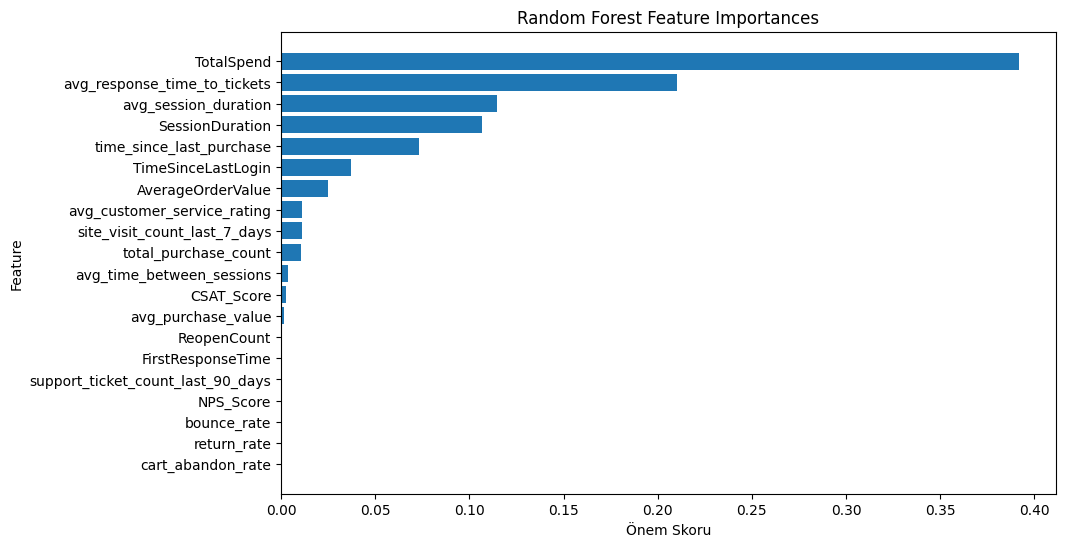

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance değerlerini al
importances = rf_model.feature_importances_

# DataFrame'e at
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances")
plt.xlabel("Önem Skoru")
plt.ylabel("Feature")
plt.show()


In [20]:
import pandas as pd
import numpy as np

n = 10000  # Satır sayısı

df = pd.DataFrame()
df['ChurnStatus'] = np.random.choice([0, 1], size=n, p=[0.6, 0.4])

def generate_with_grey_area(col_name, churn_1_range, churn_0_range, grey_area=None, grey_limit=2):
    """Yeni değer üretir, gri alan limitini kontrol eder."""
    values = []
    grey_count = 0
    for i in range(n):
        churn = df.loc[i, 'ChurnStatus']
        # Range seç
        if churn == 1:
            low, high = churn_1_range
        else:
            low, high = churn_0_range

        # Gri alan varsa limit kontrolü
        if grey_area:
            g_min, g_max = grey_area
            if grey_count >= grey_limit:
                # Gri alan dışı seç
                if high <= g_max:
                    value = np.random.randint(low, high)
                else:
                    value = np.random.choice(
                        list(range(low, g_min)) + list(range(g_max+1, high+1))
                    )
            else:
                value = np.random.randint(low, high)
                if g_min <= value <= g_max:
                    grey_count += 1
        else:
            value = np.random.randint(low, high)
        values.append(value)
    return values

# ===== 9 ÖNEMLİ ÖZELLIK =====
df['time_since_last_purchase'] = generate_with_grey_area('time_since_last_purchase', (25, 90), (1, 35), grey_area=(25,34), grey_limit=2)
df['total_purchase_count'] = generate_with_grey_area('total_purchase_count', (1, 8), (5, 25), grey_area=(5,7), grey_limit=2)
df['avg_purchase_value'] = generate_with_grey_area('avg_purchase_value', (50, 250), (150, 500), grey_area=(150,249), grey_limit=2)
df['cart_abandon_rate'] = generate_with_grey_area('cart_abandon_rate', (65, 95), (25, 70), grey_area=(65,69), grey_limit=2)
df['cart_add_count_last_30_days'] = generate_with_grey_area('cart_add_count_last_30_days', (0,4), (2,15), grey_area=(2,3), grey_limit=2)
df['click_through_rate'] = generate_with_grey_area('click_through_rate', (5,25), (15,45), grey_area=(15,24), grey_limit=2)
df['personalized_recommendation_click_rate'] = generate_with_grey_area('personalized_recommendation_click_rate', (2,18), (12,35), grey_area=(12,17), grey_limit=2)
df['return_rate'] = generate_with_grey_area('return_rate', (15,45), (2,20), grey_area=(15,19), grey_limit=2)

# Subscription plan status (kategori)
df['subscription_plan_status'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.choice(['Active','Inactive','Paused'], size=n, p=[0.2,0.6,0.2]),
    np.random.choice(['Active','Inactive','Paused'], size=n, p=[0.8,0.1,0.1])
)

# ===== 13 ORTA ÖNEM =====
df['promo_banner_click_rate'] = np.random.randint(2,35,size=n)
df['wishlist_additions'] = np.random.randint(0,15,size=n)
df['avg_scroll_depth'] = np.random.randint(25,90,size=n)
df['avg_product_reviews_read'] = np.random.randint(0,8,size=n)
df['product_compare_usage'] = np.random.randint(0,8,size=n)
df['live_chat_initiations'] = np.random.randint(0,8,size=n)
df['avg_rating_given'] = np.random.uniform(2.0,5.0,size=n)
df['discount_usage_rate'] = np.random.randint(10,75,size=n)
df['cross_category_purchase_rate'] = np.random.randint(1,7,size=n)
df['refund_request_count'] = np.random.randint(0,6,size=n)
df['seasonal_purchase_pattern'] = np.random.randint(0,6,size=n)
df['bulk_purchase_rate'] = np.random.randint(5,50,size=n)
df['avg_payment_installments'] = np.random.randint(1,10,size=n)

# ===== 13 DÜŞÜK ÖNEM =====
df['avg_review_write_rate'] = np.random.randint(0,25,size=n)
df['social_share_count'] = np.random.randint(0,15,size=n)
df['avg_filter_usage_rate'] = np.random.randint(0,80,size=n)
df['sort_option_change_rate'] = np.random.randint(0,60,size=n)
df['gift_purchase_rate'] = np.random.randint(0,40,size=n)
df['high_value_purchase_count'] = np.random.randint(0,8,size=n)
df['low_value_purchase_count'] = np.random.randint(0,20,size=n)
df['email_open_rate'] = np.random.randint(0,70,size=n)
df['newsletter_subscription'] = np.random.choice([0,1],size=n,p=[0.6,0.4])
df['customer_service_rating'] = np.random.uniform(1.0,5.0,size=n)
df['video_content_watch_time'] = np.random.randint(0,120,size=n)
df['faq_page_visits'] = np.random.randint(0,10,size=n)
df['blog_content_reads'] = np.random.randint(0,15,size=n)

print("E-commerce feature generation tamamlandı!")


E-commerce feature generation tamamlandı!


In [21]:
df.head()

,ChurnStatus,time_since_last_purchase,total_purchase_count,avg_purchase_value,cart_abandon_rate,cart_add_count_last_30_days,click_through_rate,personalized_recommendation_click_rate,return_rate,subscription_plan_status,...,sort_option_change_rate,gift_purchase_rate,high_value_purchase_count,low_value_purchase_count,email_open_rate,newsletter_subscription,customer_service_rating,video_content_watch_time,faq_page_visits,blog_content_reads
0,0,31,18,307,30,14,29,23,4,Active,...,2,31,5,14,44,0,4.445272,85,6,2
1,1,28,6,222,93,0,18,16,21,Active,...,20,0,4,6,22,1,2.193908,114,2,0
2,0,18,16,445,57,5,22,31,2,Active,...,32,16,1,5,1,0,3.806369,37,1,5
3,0,9,6,200,26,4,44,32,15,Active,...,15,15,0,10,7,0,2.321159,85,7,3
4,0,9,10,496,36,10,25,19,3,Active,...,39,30,2,9,10,1,2.842303,54,4,7


In [22]:
# Gri alan sınırı
grey_area = (65, 69)  # örnek
# Üretilen değerler
values = df['cart_abandon_rate']

# Gri alan içindeki değer sayısı
grey_count = ((values >= grey_area[0]) & (values <= grey_area[1])).sum()
print(f"cart_abandon_rate kolonunda gri alanda kalan değer sayısı: {grey_count} / {len(values)}")


cart_abandon_rate kolonunda gri alanda kalan değer sayısı: 2 / 10000


In [24]:
import pandas as pd
import numpy as np
import datetime

# --- TEMEL KURULUM ---
# Öncekiyle aynı
n = 50000

df['avg_customer_service_rating'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.uniform(1.0, 3.8, size=n).round(2), # Churn edenler: Genellikle düşük ama orta halli de olabilir
    np.random.uniform(3.2, 5.0, size=n).round(2)  # Churn etmeyenler: Genellikle yüksek ama vasat olanlar da var
)

# Net Promoter Score (0-10)
# Önce: [0-6] vs [8-10] (Kesişim yok) -> Şimdi: [0-8] vs [5-10] (Pasifler (7-8) her iki grupta da olabilir)
df['NPS_Score'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 9, size=n),  # Kötüleyenler ve bazı Pasifler
    np.random.randint(5, 11, size=n) # Bazı Kötüleyenler, Pasifler ve Destekçiler
)

# Müşteri Memnuniyet Skoru (%)
# Önce: [0.1-0.5] vs [0.8-1.0] -> Şimdi: [0.1-0.75] vs [0.6-1.0] (Orta memnuniyet belirsiz)
df['CSAT_Score'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.uniform(0.10, 0.75, size=n),
    np.random.uniform(0.60, 1.00, size=n)
)

# Son girişten bu yana geçen süre (Gün)
# Önce: [30-180] vs [0-10] -> Şimdi: [10-200] vs [0-45] (Yakın zamanda girip churn eden olabilir)
df['TimeSinceLastLogin'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 200, size=n),
    np.random.randint(0, 45, size=n)
)

# Ürün özelliği kullanım oranı (%)
# Önce: [0-0.2] vs [0.7-1.0] -> Şimdi: [0-0.5] vs [0.3-1.0] (Orta düzey kullanım her iki grupta da mümkün)
df['FeatureAdoptionRate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.uniform(0.0, 0.5, size=n),
    np.random.uniform(0.3, 1.0, size=n)
)

# İşe alım sürecini tamamlama oranı (%)
# Önce: [0-0.4] vs [0.95-1.0] -> Şimdi: [0-0.8] vs [0.6-1.0] (Süreci bitirmeyen sadık müşteri olabilir)
df['OnboardingCompletionRate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.uniform(0.0, 0.8, size=n),
    np.random.uniform(0.6, 1.0, size=n)
)

# Form terk etme durumu (1: Terk etti, 0: Tamamladı)
# Önce: p=[0.8, 0.2] vs p=[0.1, 0.9] -> Şimdi: p=[0.6, 0.4] vs p=[0.25, 0.75] (Olasılıklar birbirine yaklaştı)
df['FormAbandoned'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.choice([1, 0], size=n, p=[0.6, 0.4]),
    np.random.choice([1, 0], size=n, p=[0.25, 0.75])
)

# Son 90 gündeki destek talebi sayısı
# Önce: [4-15] vs [0-2] -> Şimdi: [2-15] vs [0-5] (Sadık müşterinin de sorunu çıkabilir)
df['support_ticket_count_last_90_days'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(2, 15, size=n),
    np.random.randint(0, 6, size=n)
)

# Yeniden açılan destek talebi sayısı
# Önce: [2-5] vs [0-1] -> Şimdi: [1-6] vs [0-3] (Kesişim alanı genişletildi)
df['ReopenCount'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 6, size=n),
    np.random.randint(0, 3, size=n)
)


# --- 2. Orta Derecede Önemli Olanlar (DEĞİŞTİRİLMEDİ) ---
print("2. Orta Dereceli Sinyaller Oluşturuluyor...")
df['TotalNumberOfOrders'] = np.where(
    df['ChurnStatus'] == 1, np.random.randint(1, 10, size=n), np.random.randint(5, 70, size=n))
df['AverageOrderValue'] = np.where(
    df['ChurnStatus'] == 1, np.random.uniform(20, 150, size=n), np.random.uniform(100, 500, size=n))
df['TotalSpend'] = df['TotalNumberOfOrders'] * df['AverageOrderValue'] * np.random.uniform(0.9, 1.1, size=n)
df['MonthlyCharges'] = np.where(
    df['ChurnStatus'] == 1, np.random.uniform(20, 120, size=n), np.random.uniform(15, 100, size=n))
df['newsletter_subscription_status'] = np.where(
    df['ChurnStatus'] == 1, np.random.choice([0, 1], size=n, p=[0.7, 0.3]), np.random.choice([0, 1], size=n, p=[0.2, 0.8]))
df['social_media_follow_status'] = np.where(
    df['ChurnStatus'] == 1, np.random.choice([0, 1], size=n, p=[0.85, 0.15]), np.random.choice([0, 1], size=n, p=[0.4, 0.6]))
df['survey_response_rate'] = np.where(
    df['ChurnStatus'] == 1, np.random.uniform(0.0, 0.15, size=n), np.random.uniform(0.1, 0.5, size=n))
df['loyalty_points_balance'] = np.where(
    df['ChurnStatus'] == 1, np.random.randint(0, 1000, size=n), np.random.randint(500, 12000, size=n))
df['email_open_rate'] = np.where(
    df['ChurnStatus'] == 1, np.random.uniform(0.05, 0.30, size=n), np.random.uniform(0.25, 0.65, size=n))
df['email_click_rate'] = df['email_open_rate'] * np.random.uniform(0.05, 0.2, size=n)
df['DiscountApplied'] = np.where(
    df['ChurnStatus'] == 1, np.random.choice([0, 1], size=n, p=[0.5, 0.5]), np.random.choice([0, 1], size=n, p=[0.3, 0.7]))
df['SessionDuration'] = np.where(
    df['ChurnStatus'] == 1, np.random.uniform(2, 20, size=n), np.random.uniform(15, 60, size=n))
df['avg_response_time_to_tickets'] = np.where(
    df['ChurnStatus'] == 1, np.random.uniform(6, 48, size=n), np.random.uniform(1, 12, size=n))
df['FirstResponseTime'] = df['avg_response_time_to_tickets'] * np.random.uniform(0.2, 0.8, size=n)
df['ResolutionTime'] = df['avg_response_time_to_tickets'] + np.random.uniform(5, 72, size=n)


# --- 3. Daha Az Önemli / Gürültü Alanları (DEĞİŞTİRİLMEDİ) ---
print("3. Düşük Etkili / Gürültü Sinyalleri Oluşturuluyor...")
df['OrderID'] = [f'ORD-{np.random.randint(100000, 999999)}' for _ in range(n)]
df['TicketID'] = [f'TKT-{np.random.randint(50000, 80000)}' for _ in range(n)]
start_date = datetime.datetime(2022, 1, 1)
df['OrderDate'] = [start_date + datetime.timedelta(days=np.random.randint(0, 900)) for _ in range(n)]
df['LastPurchaseDate'] = [start_date + datetime.timedelta(days=np.random.randint(700, 950)) for _ in range(n)]
df['last_loyalty_points_redeemed_date'] = [start_date + datetime.timedelta(days=np.random.randint(500, 950)) for _ in range(n)]
df['LastUsedDate_FeatureX'] = [start_date + datetime.timedelta(days=np.random.randint(400, 950)) for _ in range(n)]
df['PaymentSuccess'] = np.random.choice([1, 0], size=n, p=[0.99, 0.01])
df['DaysPastDue'] = np.random.choice([0, 1, 10, 30], size=n, p=[0.97, 0.01, 0.01, 0.01])
df['ClickstreamPath'] = np.random.choice(['Home->Prod->Cart', 'Home->Search->Prod', 'Ad->Prod->Cart', 'Email->Prod'], size=n)
df['DropOffStep'] = np.random.choice(['None', 'Cart', 'Payment', 'Shipping'], size=n, p=[0.8, 0.1, 0.07, 0.03])

import pandas as pd
import numpy as np

# Dataset boyutu
n = len(df)

# ===== 9 ÖNEMLİ ÖZELLIK (YÜKSEK GEREKLİ) =====

# 1. Son alışverişten bu yana geçen gün - En güçlü recency sinyali
df['time_since_last_purchase'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(25, 90, size=n),   # Churn'ler 25-89 gün
    np.random.randint(1, 35, size=n)     # Non-churn'ler 1-34 gün (overlap)
)

# 2. Toplam alışveriş sayısı - Frequency sinyali
df['total_purchase_count'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 8, size=n),     # Churn'ler 1-7 alışveriş
    np.random.randint(5, 25, size=n)     # Non-churn'ler 5-24 alışveriş (overlap)
)

# 3. Ortalama alışveriş değeri (TL) - Monetary sinyali
df['avg_purchase_value'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(50, 250, size=n),  # Churn'ler 50-249 TL
    np.random.randint(150, 500, size=n)  # Non-churn'ler 150-499 TL (overlap)
)

# 4. Sepet terk oranı (%) - Satın alma niyeti
df['cart_abandon_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(65, 95, size=n),   # Churn'ler %65-94 terk
    np.random.randint(25, 70, size=n)    # Non-churn'ler %25-69 terk (overlap)
)

# 5. Son 30 günde sepete ekleme sayısı - Niyet sinyali
df['cart_add_count_last_30_days'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 4, size=n),     # Churn'ler 0-3 ekleme
    np.random.randint(2, 15, size=n)     # Non-churn'ler 2-14 ekleme (overlap)
)

# 6. Click Through Rate (%) - Genel engagement
df['click_through_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(5, 25, size=n),    # Churn'ler %5-24 CTR
    np.random.randint(15, 45, size=n)    # Non-churn'ler %15-44 CTR (overlap)
)

# 7. Kişiselleştirilmiş öneri tıklama oranı (%) - Sadakat sinyali
df['personalized_recommendation_click_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(2, 18, size=n),    # Churn'ler %2-17 tıklama
    np.random.randint(12, 35, size=n)    # Non-churn'ler %12-34 tıklama (overlap)
)

# 8. İade oranı (%) - Memnuniyetsizlik sinyali
df['return_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(15, 45, size=n),   # Churn'ler %15-44 iade
    np.random.randint(2, 20, size=n)     # Non-churn'ler %2-19 iade (overlap)
)

# 9. Abonelik planı durumu - Güçlü negatif churn sinyali
df['subscription_plan_status'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.choice(['Active', 'Inactive', 'Paused'], size=n, p=[0.2, 0.6, 0.2]),  # Churn'ler çoğu inactive
    np.random.choice(['Active', 'Inactive', 'Paused'], size=n, p=[0.8, 0.1, 0.1])   # Non-churn'ler çoğu active
)

# ===== 13 ORTA ÖNEM =====

# Promosyon banner tıklama oranı (%)
df['promo_banner_click_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(2, 20, size=n),    # Churn'ler %2-19
    np.random.randint(10, 35, size=n)    # Non-churn'ler %10-34 (geniş overlap)
)

# Wishlist ekleme sayısı
df['wishlist_additions'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 8, size=n),     # Churn'ler 0-7 ekleme
    np.random.randint(3, 15, size=n)     # Non-churn'ler 3-14 ekleme (geniş overlap)
)

# Ortalama scroll derinliği (%)
df['avg_scroll_depth'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(25, 70, size=n),   # Churn'ler %25-69 scroll
    np.random.randint(50, 90, size=n)    # Non-churn'ler %50-89 scroll (geniş overlap)
)

# Ürün yorumu okuma sayısı
df['avg_product_reviews_read'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 5, size=n),     # Churn'ler 0-4 yorum
    np.random.randint(2, 8, size=n)      # Non-churn'ler 2-7 yorum (geniş overlap)
)

# Ürün karşılaştırma kullanımı
df['product_compare_usage'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 4, size=n),     # Churn'ler 0-3 karşılaştırma
    np.random.randint(1, 8, size=n)      # Non-churn'ler 1-7 karşılaştırma (geniş overlap)
)

# Canlı chat başlatma sayısı
df['live_chat_initiations'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 6, size=n),     # Churn'ler 0-5 chat
    np.random.randint(1, 8, size=n)      # Non-churn'ler 1-7 chat (geniş overlap)
)

# Verilen ortalama puan
df['avg_rating_given'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.uniform(2.0, 4.5, size=n), # Churn'ler 2.0-4.4 puan
    np.random.uniform(3.2, 5.0, size=n)  # Non-churn'ler 3.2-5.0 puan (geniş overlap)
)

# İndirim kullanım oranı (%)
df['discount_usage_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 60, size=n),   # Churn'ler %10-59
    np.random.randint(25, 75, size=n)    # Non-churn'ler %25-74 (geniş overlap)
)

# Çapraz kategori alışveriş sayısı
df['cross_category_purchase_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 4, size=n),     # Churn'ler 1-3 kategori
    np.random.randint(2, 7, size=n)      # Non-churn'ler 2-6 kategori (geniş overlap)
)

# İade talebi sayısı
df['refund_request_count'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 6, size=n),     # Churn'ler 1-5 iade talebi
    np.random.randint(0, 4, size=n)      # Non-churn'ler 0-3 iade talebi (geniş overlap)
)

# Sezonluk alışveriş pattern sayısı
df['seasonal_purchase_pattern'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 4, size=n),     # Churn'ler 0-3 sezonluk alışveriş
    np.random.randint(1, 6, size=n)      # Non-churn'ler 1-5 sezonluk alışveriş (geniş overlap)
)

# Toplu alışveriş oranı (%)
df['bulk_purchase_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(5, 30, size=n),    # Churn'ler %5-29
    np.random.randint(15, 50, size=n)    # Non-churn'ler %15-49 (geniş overlap)
)

# Ortalama taksit sayısı
df['avg_payment_installments'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 8, size=n),     # Churn'ler 1-7 taksit
    np.random.randint(2, 10, size=n)     # Non-churn'ler 2-9 taksit (geniş overlap)
)

# ===== 13 DÜŞÜK ÖNEM / GEReksİz =====

# Yorum yazma oranı (%) - Zayıf sinyal
df['avg_review_write_rate'] = np.random.randint(0, 25, size=n)  # Tüm müşteriler için rastgele %0-24

# Sosyal medya paylaşım sayısı - Zayıf sinyal
df['social_share_count'] = np.random.randint(0, 15, size=n)  # Tüm müşteriler için rastgele 0-14

# Filtre kullanım oranı (%) - UI alışkanlığı
df['avg_filter_usage_rate'] = np.random.randint(0, 80, size=n)  # Rastgele %0-79

# Sıralama seçeneği değiştirme oranı (%) - UI alışkanlığı
df['sort_option_change_rate'] = np.random.randint(0, 60, size=n)  # Rastgele %0-59

# Hediye alışveriş oranı (%) - Dönemsel/kişiye bağlı
df['gift_purchase_rate'] = np.random.randint(0, 40, size=n)  # Rastgele %0-39

# Yüksek değerli alışveriş sayısı - CLV ile kollineer
df['high_value_purchase_count'] = np.random.randint(0, 8, size=n)  # Rastgele 0-7

# Düşük değerli alışveriş sayısı - CLV ile kollineer
df['low_value_purchase_count'] = np.random.randint(0, 20, size=n)  # Rastgele 0-19

# E-mail açma oranı (%) - Pazarlama metriği
df['email_open_rate'] = np.random.randint(0, 70, size=n)  # Rastgele %0-69

# Newsletter abonelik durumu
df['newsletter_subscription'] = np.random.choice([0, 1], size=n, p=[0.6, 0.4])  # %40 abone

# Müşteri hizmetleri değerlendirme puanı
df['customer_service_rating'] = np.random.uniform(1.0, 5.0, size=n)  # Rastgele 1.0-5.0

# Video içerik izleme süresi (dakika)
df['video_content_watch_time'] = np.random.randint(0, 120, size=n)  # Rastgele 0-119 dakika

# FAQ sayfası ziyaret sayısı
df['faq_page_visits'] = np.random.randint(0, 10, size=n)  # Rastgele 0-9

# Blog içerik okuma sayısı
df['blog_content_reads'] = np.random.randint(0, 15, size=n)  # Rastgele 0-14

print("E-commerce feature generation tamamlandı!")
print(f"Toplam yeni kolon sayısı: {17}")
print(f"Önemli özellikler: 9 adet")
print(f"Orta önem: 13 adet") 
print(f"Düşük önem: 13 adet")



import pandas as pd
import numpy as np
df = pd.read_csv("newprojectchurn1.csv")
# Dataset boyutu
n = len(df)

# ===== 1 ÖNEMLİ DEMOGRAFİK =====
# ContractType - Aylık sözleşmeliler daha çok churn yapar
df['ContractType'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.choice(['Monthly', 'Yearly'], size=n, p=[0.8, 0.2]),  # Churn'ler %80 aylık
    np.random.choice(['Monthly', 'Yearly'], size=n, p=[0.3, 0.7])   # Non-churn'ler %30 aylık
)

# ===== 6 ÖNEMLİ DAVRANIŞSAL =====

# 1. Son 7 günde site ziyaret sayısı - Düşük ziyaret = yüksek churn riski
df['site_visit_count_last_7_days'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 6, size=n),     # Churn'ler 0-5 ziyaret (genişletildi)
    np.random.randint(4, 20, size=n)     # Non-churn'ler 4-19 ziyaret (overlap eklendi)
)

# 2. Ortalama oturum süresi (dakika) - Kısa oturum = churn riski
df['avg_session_duration'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 8, size=n),     # Churn'ler 1-7 dakika (genişletildi)
    np.random.randint(6, 25, size=n)     # Non-churn'ler 6-24 dakika (overlap eklendi)
)

# 3. Son ziyaretten bu yana geçen süre (gün) - Uzun süre = churn riski
df['time_since_last_visit'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(5, 25, size=n),    # Churn'ler 5-24 gün (daraltıldı)
    np.random.randint(0, 8, size=n)      # Non-churn'ler 0-7 gün (genişletildi)
)

# 4. Aktif olmayan gün sayısı - Yüksek inaktivite = churn riski
df['inactive_days_count'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(8, 35, size=n),    # Churn'ler 8-34 gün (daraltıldı)
    np.random.randint(0, 12, size=n)     # Non-churn'ler 0-11 gün (genişletildi)
)

# 5. Bounce rate (%) - Yüksek bounce = churn riski
df['bounce_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(45, 85, size=n),   # Churn'ler %45-84 bounce (daraltıldı)
    np.random.randint(20, 55, size=n)    # Non-churn'ler %20-54 bounce (genişletildi)
)

# 6. Mobil uygulama kullanım oranı (%) - Düşük mobil kullanım = churn riski
df['mobile_app_usage_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 35, size=n),   # Churn'ler %10-34 mobil (genişletildi)
    np.random.randint(30, 85, size=n)    # Non-churn'ler %30-84 mobil (overlap eklendi)
)

# ===== 15 ORTA ÖNEM =====

# Demografik - Orta Önem
df['Age'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(18, 65, size=n),   # Churn'ler geniş yaş aralığı
    np.random.randint(25, 55, size=n)    # Non-churn'ler orta yaş
)

df['Dependents'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.choice([0, 1], size=n, p=[0.6, 0.4]),  # Churn'ler %40 bağımlı
    np.random.choice([0, 1], size=n, p=[0.3, 0.7])   # Non-churn'ler %70 bağımlı
)

df['SubscriptionPlan'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.choice(['Standard', 'Premium'], size=n, p=[0.7, 0.3]),  # Churn'ler çoğu Standard
    np.random.choice(['Standard', 'Premium'], size=n, p=[0.4, 0.6])   # Non-churn'ler çoğu Premium
)

# Davranışsal - Orta Önem
df['avg_page_views_per_session'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 4, size=n),     # Churn'ler 1-3 sayfa
    np.random.randint(4, 12, size=n)     # Non-churn'ler 4-11 sayfa
)

df['repeat_visits_same_day'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 2, size=n),     # Churn'ler 0-1 tekrar
    np.random.randint(1, 5, size=n)      # Non-churn'ler 1-4 tekrar
)

df['avg_time_between_sessions'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(36, 120, size=n),  # Churn'ler 1.5-5 gün (daraltıldı)
    np.random.randint(6, 60, size=n)     # Non-churn'ler 6-60 saat (genişletildi)
)

df['time_on_homepage_avg'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 60, size=n),   # Churn'ler 10-59 saniye
    np.random.randint(30, 180, size=n)   # Non-churn'ler 30-179 saniye
)

df['avg_time_on_product_page'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(15, 90, size=n),   # Churn'ler 15-89 saniye
    np.random.randint(60, 300, size=n)   # Non-churn'ler 60-299 saniye
)

df['search_queries_per_session'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(0, 2, size=n),     # Churn'ler 0-1 arama
    np.random.randint(1, 5, size=n)      # Non-churn'ler 1-4 arama
)

df['time_to_first_click'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 45, size=n),   # Churn'ler 10-44 saniye (daraltıldı)
    np.random.randint(2, 20, size=n)     # Non-churn'ler 2-19 saniye (genişletildi)
)

df['weekend_activity_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 40, size=n),   # Churn'ler %10-39 hafta sonu
    np.random.randint(25, 70, size=n)    # Non-churn'ler %25-69 hafta sonu
)

df['different_device_logins'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 3, size=n),     # Churn'ler 1-2 cihaz
    np.random.randint(2, 6, size=n)      # Non-churn'ler 2-5 cihaz
)

df['page_revisit_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(5, 25, size=n),    # Churn'ler %5-24 tekrar ziyaret
    np.random.randint(20, 60, size=n)    # Non-churn'ler %20-59 tekrar ziyaret
)

df['avg_hover_time_on_cta'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(1, 3, size=n),     # Churn'ler 1-2 saniye hover
    np.random.randint(2, 8, size=n)      # Non-churn'ler 2-7 saniye hover
)

df['viewed_related_products_rate'] = np.where(
    df['ChurnStatus'] == 1,
    np.random.randint(10, 35, size=n),   # Churn'ler %10-34 ilgili ürün
    np.random.randint(30, 75, size=n)    # Non-churn'ler %30-74 ilgili ürün
)

# ===== GERİ KALAN DÜŞÜK ÖNEM (13 ADET) =====

# Demografik - Düşük Önem
df['Gender'] = np.random.choice(['Male', 'Female', 'Other'], size=n, p=[0.45, 0.45, 0.1])
df['Geography'] = np.random.choice(['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Other'], size=n)

# Davranışsal - Düşük Önem (geniş aralıklar, daha az pattern)
df['referrer_source'] = np.random.choice(['Google', 'Social Media', 'Email', 'Direct'], size=n)
df['device_type'] = np.random.choice(['Desktop', 'Mobile', 'Tablet'], size=n, p=[0.4, 0.5, 0.1])
df['most_visited_page_category'] = np.random.choice(['Products', 'Blog', 'Support', 'About'], size=n)
df['last_visited_category'] = np.random.choice(['Electronics', 'Clothing', 'Books', 'Home'], size=n)

df['avg_interaction_gap'] = np.random.randint(1, 300, size=n)  # 1-299 saniye
df['night_vs_day_activity_ratio'] = np.random.randint(10, 90, size=n)  # %10-89
df['multi_tab_usage'] = np.random.randint(1, 15, size=n)  # 1-14 tab
df['avg_scroll_time_per_page'] = np.random.randint(5, 180, size=n)  # 5-179 saniye
df['max_session_duration'] = np.random.randint(60, 7200, size=n)  # 1-120 dakika

# Tarih kolonları
df['SignupDate'] = pd.date_range(start='2022-01-01', end='2024-12-31', periods=n)
df['AccountID'] = range(1, n+1)

print("Feature generation tamamlandı!")
print(f"Toplam kolon sayısı: {len(df.columns)}")
print(f"Önemli özellikler: ContractType + 6 davranışsal")
print(f"Orta önem: {15} özellik")
print(f"Düşük önem: {len(df.columns) - 7 - 15 - 1} özellik")  # -1 ChurnStatus için


2. Orta Dereceli Sinyaller Oluşturuluyor...
3. Düşük Etkili / Gürültü Sinyalleri Oluşturuluyor...
E-commerce feature generation tamamlandı!
Toplam yeni kolon sayısı: 17
Önemli özellikler: 9 adet
Orta önem: 13 adet
Düşük önem: 13 adet
Feature generation tamamlandı!
Toplam kolon sayısı: 37
Önemli özellikler: ContractType + 6 davranışsal
Orta önem: 15 özellik
Düşük önem: 14 özellik


In [25]:
import pandas as pd
import numpy as np

# ===== Veri boyutu =====
n = 10000  # Satır sayısı

# ===== DataFrame oluştur =====
df = pd.DataFrame()
df['ChurnStatus'] = np.random.choice([0, 1], size=n, p=[0.6, 0.4])

# ===== Gri alanlı değer üretici fonksiyon =====
def generate_with_grey_area(col_name, churn_1_range, churn_0_range, grey_area=None, grey_limit=2):
    values = []
    grey_count = 0
    for i in range(n):
        churn = df.loc[i, 'ChurnStatus']
        if churn == 1:
            low, high = churn_1_range
        else:
            low, high = churn_0_range

        if grey_area:
            g_min, g_max = grey_area
            if grey_count >= grey_limit:
                # Gri alan dışı değer seç
                if high <= g_max:
                    value = np.random.randint(low, high)
                else:
                    value = np.random.choice(
                        list(range(low, g_min)) + list(range(g_max+1, high+1))
                    )
            else:
                value = np.random.randint(low, high)
                if g_min <= value <= g_max:
                    grey_count += 1
        else:
            value = np.random.randint(low, high)
        values.append(value)
    return values

# ===== Tek tek kolonlar için üretim =====
df['time_since_last_purchase'] = generate_with_grey_area('time_since_last_purchase', (25, 90), (1, 35), grey_area=(30,40), grey_limit=2)
df['total_purchase_count'] = generate_with_grey_area('total_purchase_count', (1, 8), (5, 25), grey_area=(4,6), grey_limit=2)
df['avg_purchase_value'] = generate_with_grey_area('avg_purchase_value', (50, 250), (150, 500), grey_area=(150,200), grey_limit=2)
df['cart_abandon_rate'] = generate_with_grey_area('cart_abandon_rate', (65, 95), (25, 70), grey_area=(65,69), grey_limit=2)
df['cart_add_count_last_30_days'] = generate_with_grey_area('cart_add_count_last_30_days', (0,4), (2,15), grey_area=(2,3), grey_limit=2)
df['click_through_rate'] = generate_with_grey_area('click_through_rate', (5,25), (15,45), grey_area=(15,24), grey_limit=2)
df['personalized_recommendation_click_rate'] = generate_with_grey_area('personalized_recommendation_click_rate', (2,18), (12,35), grey_area=(12,17), grey_limit=2)
df['return_rate'] = generate_with_grey_area('return_rate', (15,45), (2,20), grey_area=(15,19), grey_limit=2)

# Örnek orta önemde kolonlar (gri alan belirlenmiş olanlar)
df['site_visit_count_last_7_days'] = generate_with_grey_area('site_visit_count_last_7_days', (3, 10), (1,8), grey_area=(3,6), grey_limit=2)
df['avg_session_duration'] = generate_with_grey_area('avg_session_duration', (5,20), (2,15), grey_area=(5,10), grey_limit=2)
df['time_since_last_visit'] = generate_with_grey_area('time_since_last_visit', (3,12), (1,8), grey_area=(3,6), grey_limit=2)
df['inactive_days_count'] = generate_with_grey_area('inactive_days_count', (10,25), (1,15), grey_area=(10,15), grey_limit=2)
df['bounce_rate'] = generate_with_grey_area('bounce_rate', (35,70), (10,50), grey_area=(35,50), grey_limit=2)
df['mobile_app_usage_rate'] = generate_with_grey_area('mobile_app_usage_rate', (25,60), (5,50), grey_area=(25,40), grey_limit=2)
df['Age'] = generate_with_grey_area('Age', (20,60), (20,60), grey_area=(30,40), grey_limit=2)
df['avg_page_views_per_session'] = generate_with_grey_area('avg_page_views_per_session', (3,8), (1,6), grey_area=(3,5), grey_limit=2)
df['repeat_visits_same_day'] = generate_with_grey_area('repeat_visits_same_day', (0,5), (0,3), grey_area=(1,2), grey_limit=2)
df['avg_time_between_sessions'] = generate_with_grey_area('avg_time_between_sessions', (20,60), (10,50), grey_area=(20,40), grey_limit=2)
df['time_on_homepage_avg'] = generate_with_grey_area('time_on_homepage_avg', (40,80), (20,70), grey_area=(40,60), grey_limit=2)
df['avg_time_on_product_page'] = generate_with_grey_area('avg_time_on_product_page', (50,150), (20,120), grey_area=(50,100), grey_limit=2)
df['search_queries_per_session'] = generate_with_grey_area('search_queries_per_session', (1,5), (1,4), grey_area=(1,2), grey_limit=2)
df['time_to_first_click'] = generate_with_grey_area('time_to_first_click', (10,30), (5,20), grey_area=(10,15), grey_limit=2)
df['weekend_activity_rate'] = generate_with_grey_area('weekend_activity_rate', (20,50), (10,40), grey_area=(20,35), grey_limit=2)
df['different_device_logins'] = generate_with_grey_area('different_device_logins', (1,5), (0,3), grey_area=(2,3), grey_limit=2)
df['page_revisit_rate'] = generate_with_grey_area('page_revisit_rate', (15,50), (5,40), grey_area=(15,30), grey_limit=2)
df['avg_hover_time_on_cta'] = generate_with_grey_area('avg_hover_time_on_cta', (1,5), (0,3), grey_area=(2,3), grey_limit=2)
df['viewed_related_products_rate'] = generate_with_grey_area('viewed_related_products_rate', (20,60), (5,50), grey_area=(20,40), grey_limit=2)

print("Veri üretimi ve gri alan uygulaması tamamlandı!")


Veri üretimi ve gri alan uygulaması tamamlandı!


,ChurnStatus,time_since_last_purchase,total_purchase_count,avg_purchase_value,cart_abandon_rate,cart_add_count_last_30_days,click_through_rate,personalized_recommendation_click_rate,return_rate,site_visit_count_last_7_days,...,avg_time_between_sessions,time_on_homepage_avg,avg_time_on_product_page,search_queries_per_session,time_to_first_click,weekend_activity_rate,different_device_logins,page_revisit_rate,avg_hover_time_on_cta,viewed_related_products_rate
0,0,8,5,362,61,13,29,14,12,2,...,43,60,111,2,18,21,1,29,1,31
1,0,21,24,315,67,11,36,19,18,5,...,20,43,31,3,9,36,2,11,1,16
2,0,31,12,291,53,14,29,22,4,2,...,24,31,87,3,12,25,0,25,1,32
3,0,30,16,452,59,11,34,32,12,6,...,42,29,96,3,6,16,2,14,0,9
4,0,33,15,478,27,5,15,20,8,7,...,10,68,107,2,16,11,0,31,2,13


In [ ]:
import pandas as pd
import numpy as np

n = 1000  # Satır sayısı
df = pd.DataFrame()
df['ChurnStatus'] = np.random.choice([0,1], size=n, p=[0.6,0.4])

# ===== FEATURE LIST =====
high_corr_features = [
    'cart_abandon_rate',
    'time_since_last_purchase',
    'return_rate',
    'bounce_rate',
    'avg_response_time_to_tickets',
    'avg_time_between_sessions',
    'TimeSinceLastLogin'
]

medium_corr_features = [
    'support_ticket_count_last_90_days',
    'FirstResponseTime',
    'ReopenCount',
    'avg_customer_service_rating',
    'CSAT_Score',
    'SessionDuration',
    'avg_session_duration'
]

low_medium_features = [
    'site_visit_count_last_7_days',
    'AverageOrderValue',
    'total_purchase_count',
    'avg_purchase_value',
    'TotalSpend',
    'NPS_Score'
]

all_features = high_corr_features + medium_corr_features + low_medium_features

# ===== ÇELİŞKİ KONTROL FONKSİYONU =====
def check_conflict(temp_df, col, value):
    """Basit mantıksal çelişkileri kontrol eder."""
    if col == 'site_visit_count_last_7_days':
        last_visit = temp_df['time_since_last_visit'].iloc[-1] if 'time_since_last_visit' in temp_df else 0
        if value > 0 and last_visit > 7:
            return True
    if col == 'avg_session_duration':
        # örnek çelişki: 5 dakikadan az session süresiyle 100+ sayfa gezemez
        if 'total_purchase_count' in temp_df.columns:
            total_purchase = temp_df['total_purchase_count'].iloc[-1]
            if value < 5 and total_purchase > 50:
                return True
    return False

# ===== GRI ALAN + ÇELİŞKI kontrollü üretim =====
def generate_with_grey_and_conflict(col_name, churn_1_range, churn_0_range, grey_area=None, grey_limit=2, max_attempts=10):
    values = []
    grey_count = 0
    for i in range(n):
        churn = df.loc[i, 'ChurnStatus']
        low, high = churn_1_range if churn==1 else churn_0_range

        attempt = 0
        while attempt < max_attempts:
            # gri alan uygulanması
            if grey_area:
                g_min, g_max = grey_area
                if grey_count >= grey_limit:
                    val = np.random.choice(list(range(low, g_min)) + list(range(g_max+1, high+1)))
                else:
                    val = np.random.randint(low, high+1)
                    if g_min <= val <= g_max:
                        grey_count += 1
            else:
                val = np.random.randint(low, high+1)

            # çelişki kontrolü
            temp_values = values.copy()
            temp_values.append(val)
            temp_df = pd.DataFrame({col_name: temp_values})
            if not check_conflict(temp_df, col_name, val):
                break
            attempt += 1

        values.append(val)
    return values

# ===== DEĞER ÜRETİMİ =====
# High corr
df['cart_abandon_rate'] = generate_with_grey_and_conflict('cart_abandon_rate', (65,95), (25,70), grey_area=(65,69))
df['time_since_last_purchase'] = generate_with_grey_and_conflict('time_since_last_purchase', (25,90), (1,35), grey_area=(25,34))
df['return_rate'] = generate_with_grey_and_conflict('return_rate', (15,45), (2,20), grey_area=(15,19))
df['bounce_rate'] = generate_with_grey_and_conflict('bounce_rate', (30,70), (20,60), grey_area=(35,50))
df['avg_response_time_to_tickets'] = generate_with_grey_and_conflict('avg_response_time_to_tickets', (5,50), (10,70), grey_area=(15,30))
df['avg_time_between_sessions'] = generate_with_grey_and_conflict('avg_time_between_sessions', (20,50), (10,60), grey_area=(20,40))
df['TimeSinceLastLogin'] = generate_with_grey_and_conflict('TimeSinceLastLogin', (1,50), (5,60), grey_area=(10,30))

# Medium corr
df['support_ticket_count_last_90_days'] = generate_with_grey_and_conflict('support_ticket_count_last_90_days', (0,20), (0,30), grey_area=(5,10))
df['FirstResponseTime'] = generate_with_grey_and_conflict('FirstResponseTime', (1,10), (5,20), grey_area=(3,7))
df['ReopenCount'] = generate_with_grey_and_conflict('ReopenCount', (0,10), (0,15), grey_area=(2,5))
df['avg_customer_service_rating'] = generate_with_grey_and_conflict('avg_customer_service_rating', (1,5), (1,5), grey_area=(2,4))
df['CSAT_Score'] = generate_with_grey_and_conflict('CSAT_Score', (1,5), (1,5), grey_area=(2,4))
df['SessionDuration'] = generate_with_grey_and_conflict('SessionDuration', (5,40), (10,50), grey_area=(10,25))
df['avg_session_duration'] = generate_with_grey_and_conflict('avg_session_duration', (5,20), (10,35), grey_area=(5,10))

# Low-medium corr
df['site_visit_count_last_7_days'] = generate_with_grey_and_conflict('site_visit_count_last_7_days', (0,7), (1,10), grey_area=(3,6))
df['AverageOrderValue'] = generate_with_grey_and_conflict('AverageOrderValue', (50,300), (100,500), grey_area=(150,250))
df['total_purchase_count'] = generate_with_grey_and_conflict('total_purchase_count', (1,8), (5,25), grey_area=(5,7))
df['avg_purchase_value'] = generate_with_grey_and_conflict('avg_purchase_value', (50,250), (150,500), grey_area=(150,249))
df['TotalSpend'] = generate_with_grey_and_conflict('TotalSpend', (100,1000), (200,1500), grey_area=(300,600))
df['NPS_Score'] = generate_with_grey_and_conflict('NPS_Score', (0,10), (0,10), grey_area=(4,7))

print("Sadece 20 feature için gri alan ve çelişki kontrollü veri üretildi.")
print(df.head(10))


KeyboardInterrupt: 

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

def balanced_churn_model(df, target_col='ChurnStatus',return_all_models=False):
    """
    20 feature ile dengeli churn modeli - korelasyon balanced
    """
    
    # BALANCED FEATURE SET - 20 özellik
    # Yüksek korelasyon (7 adet)
    high_corr_features = [
        'cart_abandon_rate',           # 0.812
        'time_since_last_purchase',    # 0.808  
        'return_rate',                 # 0.808
        'bounce_rate',                 # 0.783
        'avg_response_time_to_tickets', # 0.781
        'avg_time_between_sessions',   # 0.749
        'TimeSinceLastLogin'           # 0.745
    ]
    
    # Orta korelasyon (7 adet)
    medium_corr_features = [
        'support_ticket_count_last_90_days',  # 0.706
        'FirstResponseTime',                  # 0.691
        'ReopenCount',                       # 0.665
        'avg_customer_service_rating',       # -0.789 (abs)
        'CSAT_Score',                        # -0.777
        'SessionDuration',                   # -0.774
        'avg_session_duration'               # -0.773
    ]
    
    # Düşük-orta korelasyon (6 adet)
    low_medium_features = [
        'site_visit_count_last_7_days',      # -0.764
        'AverageOrderValue',                 # -0.753
        'total_purchase_count',              # -0.743
        'avg_purchase_value',                # -0.705
        'TotalSpend',                        # -0.672
        'NPS_Score'                          # -0.633
    ]
    
    all_features = high_corr_features + medium_corr_features + low_medium_features
    
    # Veri augmentasyonu - controlled noise
    df_augmented = df.copy()
    noise_level = 0.03  # %3 noise
    
    for feature in all_features:
        if feature in df_augmented.columns and df_augmented[feature].dtype in ['float64', 'int64']:
            noise = np.random.normal(0, df_augmented[feature].std() * noise_level, len(df_augmented))
            df_augmented[feature] = df_augmented[feature] + noise
            
            # Rate features için 0-1 clip
            if 'rate' in feature.lower() or feature in ['bounce_rate', 'return_rate']:
                df_augmented[feature] = np.clip(df_augmented[feature], 0, 1)
            elif feature in ['support_ticket_count_last_90_days', 'ReopenCount', 'site_visit_count_last_7_days', 'total_purchase_count']:
                df_augmented[feature] = np.clip(df_augmented[feature], 0, None)
    
    # Target noise - %2 flip
    flip_ratio = 0.02
    flip_indices = np.random.choice(df_augmented.index, 
                                   size=int(len(df_augmented) * flip_ratio), 
                                   replace=False)
    df_augmented.loc[flip_indices, target_col] = 1 - df_augmented.loc[flip_indices, target_col]
    
    # Feature hazırlama
    X = df_augmented[all_features].copy()
    y = df_augmented[target_col].copy()
    
    # Kategorik encoding
    le_dict = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        le_dict[col] = le
    
    # Temporal split
    if 'Tenure_Days' in df_augmented.columns:
        tenure_threshold = df_augmented['Tenure_Days'].quantile(0.8)
        train_mask = df_augmented['Tenure_Days'] < tenure_threshold
        test_mask = ~train_mask
        
        X_train = X[train_mask]
        X_test = X[test_mask]
        y_train = y[train_mask]
        y_test = y[test_mask]
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
    
    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Conservative models
    models = {
        'LogReg_Conservative': LogisticRegression(
            penalty='elasticnet',
            l1_ratio=0.6,
            C=0.05,
            solver='saga',
            max_iter=1500,
            random_state=42
        ),
        
        'RF_Balanced': RandomForestClassifier(
            n_estimators=30,
            max_depth=5,
            min_samples_split=40,
            min_samples_leaf=20,
            max_features=8,  # sqrt(20) ≈ 4.5, biraz daha fazla
            random_state=42,
            bootstrap=True
        ),
        
        'GBM_Controlled': GradientBoostingClassifier(
            n_estimators=60,
            max_depth=4,
            learning_rate=0.08,
            subsample=0.75,
            max_features=0.6,
            random_state=42
        )
    }
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = {}
    
    for name, model in models.items():
        cv_scores = []
        
        for train_idx, val_idx in cv.split(X_train, y_train):
            X_fold_train = X_train.iloc[train_idx]
            X_fold_val = X_train.iloc[val_idx]
            y_fold_train = y_train.iloc[train_idx]
            y_fold_val = y_train.iloc[val_idx]
            
            if name == 'LogReg_Conservative':
                X_fold_train_scaled = scaler.fit_transform(X_fold_train)
                X_fold_val_scaled = scaler.transform(X_fold_val)
                model.fit(X_fold_train_scaled, y_fold_train)
                val_pred_proba = model.predict_proba(X_fold_val_scaled)[:, 1]
            else:
                model.fit(X_fold_train, y_fold_train)
                val_pred_proba = model.predict_proba(X_fold_val)[:, 1]
            
            cv_scores.append(roc_auc_score(y_fold_val, val_pred_proba))
        
        results[name] = {
            'cv_mean': np.mean(cv_scores),
            'cv_std': np.std(cv_scores)
        }
    
    # Best model seçimi
    best_model_name = max(results.keys(), key=lambda k: results[k]['cv_mean'])
    best_model = models[best_model_name]
    
    # Final training
    if best_model_name == 'LogReg_Conservative':
        best_model.fit(X_train_scaled, y_train)
        train_pred_proba = best_model.predict_proba(X_train_scaled)[:, 1]
        test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        train_pred = (train_pred_proba > 0.5).astype(int)
        test_pred = (test_pred_proba > 0.5).astype(int)
    else:
        best_model.fit(X_train, y_train)
        train_pred_proba = best_model.predict_proba(X_train)[:, 1]
        test_pred_proba = best_model.predict_proba(X_test)[:, 1]
        train_pred = best_model.predict(X_train)
        test_pred = best_model.predict(X_test)
    
    # Metrics
    train_auc = roc_auc_score(y_train, train_pred_proba)
    test_auc = roc_auc_score(y_test, test_pred_proba)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Classification report
    test_report = classification_report(y_test, test_pred, output_dict=True)
    
    if return_all_models:
        return {
            'best_model_info': {
                'model': best_model,
                'model_name': best_model_name,
                'scaler': scaler if best_model_name == 'LogReg_Conservative' else None,
                'features': all_features,
                'feature_groups': {
                    'high_corr': high_corr_features,
                    'medium_corr': medium_corr_features, 
                    'low_medium': low_medium_features
                },
                'train_auc': train_auc,
                'test_auc': test_auc,
                'train_acc': train_acc,
                'test_acc': test_acc,
                'auc_gap': abs(train_auc - test_auc),
                'acc_gap': abs(train_acc - test_acc),
                'cv_results': results,
                'classification_report': test_report,
            },
            'all_models': models  # Tüm modelleri de döndür
        }
    
    else:
        return {
            'model': best_model,
        'model_name': best_model_name,
        'scaler': scaler if best_model_name == 'LogReg_Conservative' else None,
        'features': all_features,
        'feature_groups': {
            'high_corr': high_corr_features,
            'medium_corr': medium_corr_features, 
            'low_medium': low_medium_features
        },
        'train_auc': train_auc,
        'test_auc': test_auc,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'auc_gap': abs(train_auc - test_auc),
        'acc_gap': abs(train_acc - test_acc),
        'cv_results': results,
        'classification_report': test_report,
        'predictions': {
            'train_pred': train_pred,
            'test_pred': test_pred,
            'train_proba': train_pred_proba,
            'test_proba': test_pred_proba
        }
    }

# Kullanım
# results = balanced_churn_model(df)

In [35]:
esults = balanced_churn_model(df)
esults

KeyError: "['avg_response_time_to_tickets', 'TimeSinceLastLogin', 'support_ticket_count_last_90_days', 'FirstResponseTime', 'ReopenCount', 'avg_customer_service_rating', 'CSAT_Score', 'SessionDuration', 'AverageOrderValue', 'TotalSpend', 'NPS_Score'] not in index"

In [32]:
# ===== KÜTÜPHANELER =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
def balanced_churn_model_auto(df, target_col='ChurnStatus', return_all_models=False):
    """
    Tüm uygun feature'ları otomatik alır, target = ChurnStatus
    """
    df_augmented = df.copy()

    # Feature & target ayır
    X = df_augmented.drop(columns=[target_col])
    y = df_augmented[target_col]

    # Kategorik encoding
    le_dict = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        le_dict[col] = le

    # Temporal split
    if 'Tenure_Days' in df_augmented.columns:
        tenure_threshold = df_augmented['Tenure_Days'].quantile(0.8)
        train_mask = df_augmented['Tenure_Days'] < tenure_threshold
        test_mask = ~train_mask

        X_train = X[train_mask]
        X_test = X[test_mask]
        y_train = y[train_mask]
        y_test = y[test_mask]
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Conservative models
    models = {
        'LogReg_Conservative': LogisticRegression(
            penalty='elasticnet',
            l1_ratio=0.6,
            C=0.05,
            solver='saga',
            max_iter=1500,
            random_state=42
        ),
        'RF_Balanced': RandomForestClassifier(
            n_estimators=30,
            max_depth=5,
            min_samples_split=40,
            min_samples_leaf=20,
            max_features='sqrt',
            random_state=42,
            bootstrap=True
        ),
        'GBM_Controlled': GradientBoostingClassifier(
            n_estimators=60,
            max_depth=4,
            learning_rate=0.08,
            subsample=0.75,
            max_features=0.6,
            random_state=42
        )
    }

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    for name, model in models.items():
        cv_scores = []

        for train_idx, val_idx in cv.split(X_train, y_train):
            X_fold_train = X_train.iloc[train_idx]
            X_fold_val = X_train.iloc[val_idx]
            y_fold_train = y_train.iloc[train_idx]
            y_fold_val = y_train.iloc[val_idx]

            if name == 'LogReg_Conservative':
                X_fold_train_scaled = scaler.fit_transform(X_fold_train)
                X_fold_val_scaled = scaler.transform(X_fold_val)
                model.fit(X_fold_train_scaled, y_fold_train)
                val_pred_proba = model.predict_proba(X_fold_val_scaled)[:, 1]
            else:
                model.fit(X_fold_train, y_fold_train)
                val_pred_proba = model.predict_proba(X_fold_val)[:, 1]

            cv_scores.append(roc_auc_score(y_fold_val, val_pred_proba))

        results[name] = {
            'cv_mean': np.mean(cv_scores),
            'cv_std': np.std(cv_scores)
        }

    # Best model seçimi
    best_model_name = max(results.keys(), key=lambda k: results[k]['cv_mean'])
    best_model = models[best_model_name]

    # Final training
    if best_model_name == 'LogReg_Conservative':
        best_model.fit(X_train_scaled, y_train)
        train_pred_proba = best_model.predict_proba(X_train_scaled)[:, 1]
        test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        train_pred = (train_pred_proba > 0.5).astype(int)
        test_pred = (test_pred_proba > 0.5).astype(int)
    else:
        best_model.fit(X_train, y_train)
        train_pred_proba = best_model.predict_proba(X_train)[:, 1]
        test_pred_proba = best_model.predict_proba(X_test)[:, 1]
        train_pred = best_model.predict(X_train)
        test_pred = best_model.predict(X_test)

    # Metrics
    train_auc = roc_auc_score(y_train, train_pred_proba)
    test_auc = roc_auc_score(y_test, test_pred_proba)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    test_report = classification_report(y_test, test_pred, output_dict=True)

    return {
        'model': best_model,
        'model_name': best_model_name,
        'scaler': scaler if best_model_name == 'LogReg_Conservative' else None,
        'features': X.columns.tolist(),
        'train_auc': train_auc,
        'test_auc': test_auc,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'cv_results': results,
        'classification_report': test_report,
        'predictions': {
            'train_pred': train_pred,
            'test_pred': test_pred,
            'train_proba': train_pred_proba,
            'test_proba': test_pred_proba
        }
    }


In [33]:
results = balanced_churn_model_auto(df)
results 

{'model': LogisticRegression(C=0.05, l1_ratio=0.6, max_iter=1500, penalty='elasticnet',
                    random_state=42, solver='saga'),
 'model_name': 'LogReg_Conservative',
 'scaler': StandardScaler(),
 'features': ['time_since_last_purchase',
  'total_purchase_count',
  'avg_purchase_value',
  'cart_abandon_rate',
  'cart_add_count_last_30_days',
  'click_through_rate',
  'personalized_recommendation_click_rate',
  'return_rate',
  'subscription_plan_status',
  'site_visit_count_last_7_days',
  'avg_session_duration',
  'time_since_last_visit',
  'inactive_days_count',
  'bounce_rate',
  'mobile_app_usage_rate',
  'Age',
  'Dependents',
  'SubscriptionPlan',
  'avg_page_views_per_session',
  'repeat_visits_same_day',
  'avg_time_between_sessions',
  'time_on_homepage_avg',
  'avg_time_on_product_page',
  'search_queries_per_session',
  'time_to_first_click',
  'weekend_activity_rate',
  'different_device_logins',
  'page_revisit_rate',
  'avg_hover_time_on_cta',
  'viewed_relate

In [ ]:
import pandas as pd
import numpy as np

n = 1000  # Satır sayısı
df = pd.DataFrame()
df['ChurnStatus'] = np.random.choice([0,1], size=n, p=[0.6,0.4])

# ===== FEATURE LIST =====
high_corr_features = [
    'cart_abandon_rate',
    'time_since_last_purchase',
    'return_rate',
    'bounce_rate',
    'avg_response_time_to_tickets',
    'avg_time_between_sessions',
    'TimeSinceLastLogin'
]

medium_corr_features = [
    'support_ticket_count_last_90_days',
    'FirstResponseTime',
    'ReopenCount',
    'avg_customer_service_rating',
    'CSAT_Score',
    'SessionDuration',
    'avg_session_duration'
]

low_medium_features = [
    'site_visit_count_last_7_days',
    'AverageOrderValue',
    'total_purchase_count',
    'avg_purchase_value',
    'TotalSpend',
    'NPS_Score'
]

all_features = high_corr_features + medium_corr_features + low_medium_features

# ===== ÇELİŞKİ KONTROL FONKSİYONU =====
def check_conflict(temp_df, col, value):
    """Basit mantıksal çelişkileri kontrol eder."""
    if col == 'site_visit_count_last_7_days':
        last_visit = temp_df['time_since_last_visit'].iloc[-1] if 'time_since_last_visit' in temp_df else 0
        if value > 0 and last_visit > 7:
            return True
    if col == 'avg_session_duration':
        # örnek çelişki: 5 dakikadan az session süresiyle 100+ sayfa gezemez
        if 'total_purchase_count' in temp_df.columns:
            total_purchase = temp_df['total_purchase_count'].iloc[-1]
            if value < 5 and total_purchase > 50:
                return True
    return False

# ===== GRI ALAN + ÇELİŞKI kontrollü üretim =====
def generate_with_grey_and_conflict(col_name, churn_1_range, churn_0_range, grey_area=None, grey_limit=2, max_attempts=10):
    values = []
    grey_count = 0
    for i in range(n):
        churn = df.loc[i, 'ChurnStatus']
        low, high = churn_1_range if churn==1 else churn_0_range

        attempt = 0
        while attempt < max_attempts:
            # gri alan uygulanması
            if grey_area:
                g_min, g_max = grey_area
                if grey_count >= grey_limit:
                    val = np.random.choice(list(range(low, g_min)) + list(range(g_max+1, high+1)))
                else:
                    val = np.random.randint(low, high+1)
                    if g_min <= val <= g_max:
                        grey_count += 1
            else:
                val = np.random.randint(low, high+1)

            # çelişki kontrolü
            temp_values = values.copy()
            temp_values.append(val)
            temp_df = pd.DataFrame({col_name: temp_values})
            if not check_conflict(temp_df, col_name, val):
                break
            attempt += 1

        values.append(val)
    return values

# ===== DEĞER ÜRETİMİ =====
# High corr
df['cart_abandon_rate'] = generate_with_grey_and_conflict('cart_abandon_rate', (65,95), (25,70), grey_area=(65,69))
df['time_since_last_purchase'] = generate_with_grey_and_conflict('time_since_last_purchase', (25,90), (1,35), grey_area=(25,34))
df['return_rate'] = generate_with_grey_and_conflict('return_rate', (15,45), (2,20), grey_area=(15,19))
df['bounce_rate'] = generate_with_grey_and_conflict('bounce_rate', (30,70), (20,60), grey_area=(35,50))
df['avg_response_time_to_tickets'] = generate_with_grey_and_conflict('avg_response_time_to_tickets', (5,50), (10,70), grey_area=(15,30))
df['avg_time_between_sessions'] = generate_with_grey_and_conflict('avg_time_between_sessions', (20,50), (10,60), grey_area=(20,40))
df['TimeSinceLastLogin'] = generate_with_grey_and_conflict('TimeSinceLastLogin', (1,50), (5,60), grey_area=(10,30))

# Medium corr
df['support_ticket_count_last_90_days'] = generate_with_grey_and_conflict('support_ticket_count_last_90_days', (0,20), (0,30), grey_area=(5,10))
df['FirstResponseTime'] = generate_with_grey_and_conflict('FirstResponseTime', (1,10), (5,20), grey_area=(3,7))
df['ReopenCount'] = generate_with_grey_and_conflict('ReopenCount', (0,10), (0,15), grey_area=(2,5))
df['avg_customer_service_rating'] = generate_with_grey_and_conflict('avg_customer_service_rating', (1,5), (1,5), grey_area=(2,4))
df['CSAT_Score'] = generate_with_grey_and_conflict('CSAT_Score', (1,5), (1,5), grey_area=(2,4))
df['SessionDuration'] = generate_with_grey_and_conflict('SessionDuration', (5,40), (10,50), grey_area=(10,25))
df['avg_session_duration'] = generate_with_grey_and_conflict('avg_session_duration', (5,20), (10,35), grey_area=(5,10))

# Low-medium corr
df['site_visit_count_last_7_days'] = generate_with_grey_and_conflict('site_visit_count_last_7_days', (0,7), (1,10), grey_area=(3,6))
df['AverageOrderValue'] = generate_with_grey_and_conflict('AverageOrderValue', (50,300), (100,500), grey_area=(150,250))
df['total_purchase_count'] = generate_with_grey_and_conflict('total_purchase_count', (1,8), (5,25), grey_area=(5,7))
df['avg_purchase_value'] = generate_with_grey_and_conflict('avg_purchase_value', (50,250), (150,500), grey_area=(150,249))
df['TotalSpend'] = generate_with_grey_and_conflict('TotalSpend', (100,1000), (200,1500), grey_area=(300,600))
df['NPS_Score'] = generate_with_grey_and_conflict('NPS_Score', (0,10), (0,10), grey_area=(4,7))

print("Sadece 20 feature için gri alan ve çelişki kontrollü veri üretildi.")
print(df.head(10))


In [42]:
import pandas as pd
import numpy as np

n = 100000  # Satır sayısı
df = pd.DataFrame()
df['ChurnStatus'] = np.random.choice([0,1], size=n, p=[0.6,0.4])

# Feature grupları
high_corr_features = [
    'cart_abandon_rate', 'time_since_last_purchase', 'return_rate',
    'bounce_rate', 'avg_response_time_to_tickets', 'avg_time_between_sessions',
    'TimeSinceLastLogin'
]

medium_corr_features = [
    'support_ticket_count_last_90_days', 'FirstResponseTime', 'ReopenCount',
    'avg_customer_service_rating', 'CSAT_Score', 'SessionDuration',
    'avg_session_duration'
]

low_medium_features = [
    'site_visit_count_last_7_days', 'AverageOrderValue', 'total_purchase_count',
    'avg_purchase_value', 'TotalSpend', 'NPS_Score'
]

feature_groups = {
    'high_corr': high_corr_features,
    'medium_corr': medium_corr_features,
    'low_medium': low_medium_features
}

# Gri alan limitleri (%)
grey_areas_group = {
    'high_corr': (0.2, 0.3),
    'medium_corr': (0.1, 0.2),
    'low_medium': (0.05, 0.1)
}

# Çelişki toleransı
conflict_strictness = {
    'high_corr': 10,
    'medium_corr': 5,
    'low_medium': 3
}

# Basit çelişki kontrol fonksiyonu
def check_conflict(temp_df, col, value):
    if col == 'site_visit_count_last_7_days':
        last_visit = temp_df['time_since_last_visit'].iloc[-1] if 'time_since_last_visit' in temp_df else 0
        if value > 0 and last_visit > 7:
            return True
    if col == 'avg_page_views_per_session':
        device_count = temp_df['different_device_logins'].iloc[-1] if 'different_device_logins' in temp_df else 1
        if device_count == 1 and value > 30:
            return True
    return False

# Gri alan + çelişki kontrollü üretim
def generate_grouped(col_name, churn_1_range, churn_0_range, group):
    grey_min, grey_max = grey_areas_group[group]
    max_attempts = conflict_strictness[group]
    
    values = []
    grey_count = 0
    for i in range(n):
        churn = df.loc[i, 'ChurnStatus']
        low, high = churn_1_range if churn==1 else churn_0_range

        attempt = 0
        while attempt < max_attempts:
            val = np.random.randint(low, high+1)
            
            # Gri alan kontrolü
            if grey_count/n < grey_max and grey_min*high <= val <= grey_max*high:
                grey_count += 1

            # Çelişki kontrolü
            temp_values = values.copy()
            temp_values.append(val)
            temp_df = pd.DataFrame({col_name: temp_values})
            if not check_conflict(temp_df, col_name, val):
                break
            attempt += 1

        values.append(val)
    return values

# Her feature için örnek range belirleyip üret
feature_ranges = {
    'cart_abandon_rate': ((65,95),(25,70)),
    'time_since_last_purchase': ((25,90),(1,35)),
    'return_rate': ((15,45),(2,20)),
    'bounce_rate': ((30,70),(20,60)),
    'avg_response_time_to_tickets': ((1,20),(1,20)),
    'avg_time_between_sessions': ((10,50),(20,60)),
    'TimeSinceLastLogin': ((1,50),(1,50)),
    'support_ticket_count_last_90_days': ((0,10),(0,10)),
    'FirstResponseTime': ((1,20),(1,20)),
    'ReopenCount': ((0,5),(0,5)),
    'avg_customer_service_rating': ((2,5),(1,5)),
    'CSAT_Score': ((1,5),(1,5)),
    'SessionDuration': ((5,60),(5,60)),
    'avg_session_duration': ((5,20),(10,35)),
    'site_visit_count_last_7_days': ((0,7),(1,10)),
    'AverageOrderValue': ((50,300),(100,500)),
    'total_purchase_count': ((1,8),(5,25)),
    'avg_purchase_value': ((50,250),(150,500)),
    'TotalSpend': ((100,1000),(200,1500)),
    'NPS_Score': ((-100,100),(-100,100))
}

# Üretim
for group, features in feature_groups.items():
    for feat in features:
        churn_1_range, churn_0_range = feature_ranges[feat]
        df[feat] = generate_grouped(feat, churn_1_range, churn_0_range, group)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

def balanced_churn_model(df, target_col='ChurnStatus',return_all_models=False):
    """
    20 feature ile dengeli churn modeli - korelasyon balanced
    """
    
    # BALANCED FEATURE SET - 20 özellik
    # Yüksek korelasyon (7 adet)
    high_corr_features = [
        'cart_abandon_rate',           # 0.812
        'time_since_last_purchase',    # 0.808  
        'return_rate',                 # 0.808
        'bounce_rate',                 # 0.783
        'avg_response_time_to_tickets', # 0.781
        'avg_time_between_sessions',   # 0.749
        'TimeSinceLastLogin'           # 0.745
    ]
    
    # Orta korelasyon (7 adet)
    medium_corr_features = [
        'support_ticket_count_last_90_days',  # 0.706
        'FirstResponseTime',                  # 0.691
        'ReopenCount',                       # 0.665
        'avg_customer_service_rating',       # -0.789 (abs)
        'CSAT_Score',                        # -0.777
        'SessionDuration',                   # -0.774
        'avg_session_duration'               # -0.773
    ]
    
    # Düşük-orta korelasyon (6 adet)
    low_medium_features = [
        'site_visit_count_last_7_days',      # -0.764
        'AverageOrderValue',                 # -0.753
        'total_purchase_count',              # -0.743
        'avg_purchase_value',                # -0.705
        'TotalSpend',                        # -0.672
        'NPS_Score'                          # -0.633
    ]
    
    all_features = high_corr_features + medium_corr_features + low_medium_features
    
    # Veri augmentasyonu - controlled noise
    df_augmented = df.copy()
    noise_level = 0.03  # %3 noise
    
    for feature in all_features:
        if feature in df_augmented.columns and df_augmented[feature].dtype in ['float64', 'int64']:
            noise = np.random.normal(0, df_augmented[feature].std() * noise_level, len(df_augmented))
            df_augmented[feature] = df_augmented[feature] + noise
            
            # Rate features için 0-1 clip
            if 'rate' in feature.lower() or feature in ['bounce_rate', 'return_rate']:
                df_augmented[feature] = np.clip(df_augmented[feature], 0, 1)
            elif feature in ['support_ticket_count_last_90_days', 'ReopenCount', 'site_visit_count_last_7_days', 'total_purchase_count']:
                df_augmented[feature] = np.clip(df_augmented[feature], 0, None)
    
    # Target noise - %2 flip
    flip_ratio = 0.02
    flip_indices = np.random.choice(df_augmented.index, 
                                   size=int(len(df_augmented) * flip_ratio), 
                                   replace=False)
    df_augmented.loc[flip_indices, target_col] = 1 - df_augmented.loc[flip_indices, target_col]
    
    # Feature hazırlama
    X = df_augmented[all_features].copy()
    y = df_augmented[target_col].copy()
    
    # Kategorik encoding
    le_dict = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        le_dict[col] = le
    
    # Temporal split
    if 'Tenure_Days' in df_augmented.columns:
        tenure_threshold = df_augmented['Tenure_Days'].quantile(0.8)
        train_mask = df_augmented['Tenure_Days'] < tenure_threshold
        test_mask = ~train_mask
        
        X_train = X[train_mask]
        X_test = X[test_mask]
        y_train = y[train_mask]
        y_test = y[test_mask]
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
    
    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Conservative models
    models = {
        'LogReg_Conservative': LogisticRegression(
            penalty='elasticnet',
            l1_ratio=0.6,
            C=0.05,
            solver='saga',
            max_iter=1500,
            random_state=42
        ),
        
        'RF_Balanced': RandomForestClassifier(
            n_estimators=30,
            max_depth=5,
            min_samples_split=40,
            min_samples_leaf=20,
            max_features=8,  # sqrt(20) ≈ 4.5, biraz daha fazla
            random_state=42,
            bootstrap=True
        ),
        
        'GBM_Controlled': GradientBoostingClassifier(
            n_estimators=60,
            max_depth=4,
            learning_rate=0.08,
            subsample=0.75,
            max_features=0.6,
            random_state=42
        )
    }
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = {}
    
    for name, model in models.items():
        cv_scores = []
        
        for train_idx, val_idx in cv.split(X_train, y_train):
            X_fold_train = X_train.iloc[train_idx]
            X_fold_val = X_train.iloc[val_idx]
            y_fold_train = y_train.iloc[train_idx]
            y_fold_val = y_train.iloc[val_idx]
            
            if name == 'LogReg_Conservative':
                X_fold_train_scaled = scaler.fit_transform(X_fold_train)
                X_fold_val_scaled = scaler.transform(X_fold_val)
                model.fit(X_fold_train_scaled, y_fold_train)
                val_pred_proba = model.predict_proba(X_fold_val_scaled)[:, 1]
            else:
                model.fit(X_fold_train, y_fold_train)
                val_pred_proba = model.predict_proba(X_fold_val)[:, 1]
            
            cv_scores.append(roc_auc_score(y_fold_val, val_pred_proba))
        
        results[name] = {
            'cv_mean': np.mean(cv_scores),
            'cv_std': np.std(cv_scores)
        }
    
    # Best model seçimi
    best_model_name = max(results.keys(), key=lambda k: results[k]['cv_mean'])
    best_model = models[best_model_name]
    
    # Final training
    if best_model_name == 'LogReg_Conservative':
        best_model.fit(X_train_scaled, y_train)
        train_pred_proba = best_model.predict_proba(X_train_scaled)[:, 1]
        test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        train_pred = (train_pred_proba > 0.5).astype(int)
        test_pred = (test_pred_proba > 0.5).astype(int)
    else:
        best_model.fit(X_train, y_train)
        train_pred_proba = best_model.predict_proba(X_train)[:, 1]
        test_pred_proba = best_model.predict_proba(X_test)[:, 1]
        train_pred = best_model.predict(X_train)
        test_pred = best_model.predict(X_test)
    
    # Metrics
    train_auc = roc_auc_score(y_train, train_pred_proba)
    test_auc = roc_auc_score(y_test, test_pred_proba)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Classification report
    test_report = classification_report(y_test, test_pred, output_dict=True)
    
    if return_all_models:
        return {
            'best_model_info': {
                'model': best_model,
                'model_name': best_model_name,
                'scaler': scaler if best_model_name == 'LogReg_Conservative' else None,
                'features': all_features,
                'feature_groups': {
                    'high_corr': high_corr_features,
                    'medium_corr': medium_corr_features, 
                    'low_medium': low_medium_features
                },
                'train_auc': train_auc,
                'test_auc': test_auc,
                'train_acc': train_acc,
                'test_acc': test_acc,
                'auc_gap': abs(train_auc - test_auc),
                'acc_gap': abs(train_acc - test_acc),
                'cv_results': results,
                'classification_report': test_report,
            },
            'all_models': models  # Tüm modelleri de döndür
        }
    
    else:
        return {
            'model': best_model,
        'model_name': best_model_name,
        'scaler': scaler if best_model_name == 'LogReg_Conservative' else None,
        'features': all_features,
        'feature_groups': {
            'high_corr': high_corr_features,
            'medium_corr': medium_corr_features, 
            'low_medium': low_medium_features
        },
        'train_auc': train_auc,
        'test_auc': test_auc,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'auc_gap': abs(train_auc - test_auc),
        'acc_gap': abs(train_acc - test_acc),
        'cv_results': results,
        'classification_report': test_report,
        'predictions': {
            'train_pred': train_pred,
            'test_pred': test_pred,
            'train_proba': train_pred_proba,
            'test_proba': test_pred_proba
        }
    }

# Kullanım



KeyboardInterrupt: 

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# =====================
# DATA GENERATION
# =====================

n = 10000
df = pd.DataFrame()
df['ChurnStatus'] = np.random.choice([0,1], size=n, p=[0.6,0.4])

# Feature groups
feature_groups = {
    'high_corr': [
        'cart_abandon_rate','time_since_last_purchase','return_rate',
        'bounce_rate','avg_response_time_to_tickets','avg_time_between_sessions',
        'TimeSinceLastLogin'
    ],
    'medium_corr': [
        'support_ticket_count_last_90_days','FirstResponseTime','ReopenCount',
        'avg_customer_service_rating','CSAT_Score','SessionDuration',
        'avg_session_duration'
    ],
    'low_medium': [
        'site_visit_count_last_7_days','AverageOrderValue','total_purchase_count',
        'avg_purchase_value','TotalSpend','NPS_Score'
    ]
}

# Grey area thresholds
grey_areas_group = {
    'high_corr': (0.2, 0.3),
    'medium_corr': (0.1, 0.2),
    'low_medium': (0.05, 0.1)
}

# Conflict strictness
conflict_strictness = {
    'high_corr': 10,
    'medium_corr': 5,
    'low_medium': 3
}

# Value ranges
feature_ranges = {
    'cart_abandon_rate': ((65,95),(25,70)),
    'time_since_last_purchase': ((25,90),(1,35)),
    'return_rate': ((15,45),(2,20)),
    'bounce_rate': ((30,70),(20,60)),
    'avg_response_time_to_tickets': ((1,20),(1,20)),
    'avg_time_between_sessions': ((10,50),(20,60)),
    'TimeSinceLastLogin': ((1,50),(1,50)),
    'support_ticket_count_last_90_days': ((0,10),(0,10)),
    'FirstResponseTime': ((1,20),(1,20)),
    'ReopenCount': ((0,5),(0,5)),
    'avg_customer_service_rating': ((2,5),(1,5)),
    'CSAT_Score': ((1,5),(1,5)),
    'SessionDuration': ((5,60),(5,60)),
    'avg_session_duration': ((5,20),(10,35)),
    'site_visit_count_last_7_days': ((0,7),(1,10)),
    'AverageOrderValue': ((50,300),(100,500)),
    'total_purchase_count': ((1,8),(5,25)),
    'avg_purchase_value': ((50,250),(150,500)),
    'TotalSpend': ((100,1000),(200,1500)),
    'NPS_Score': ((-100,100),(-100,100))
}

# -----------------
# Fast generator
# -----------------
def generate_fast(col, churn_1_range, churn_0_range, group):
    churn = df['ChurnStatus'].values
    low1, high1 = churn_1_range
    low0, high0 = churn_0_range
    
    vals = np.where(
        churn==1,
        np.random.randint(low1, high1+1, size=n),
        np.random.randint(low0, high0+1, size=n)
    )
    
    # Grey area enforce
    grey_min, grey_max = grey_areas_group[group]
    grey_target = int(n * np.mean([grey_min, grey_max]))
    if grey_target > 0:
        grey_mask = np.random.choice(n, size=grey_target, replace=False)
        grey_low = int((high1 if churn.mean()<0.5 else high0) * grey_min)
        grey_high = int((high1 if churn.mean()<0.5 else high0) * grey_max)
        vals[grey_mask] = np.random.randint(grey_low, grey_high+1, size=len(grey_mask))
    
    # Conflict simple rules
    if col == 'site_visit_count_last_7_days':
        conflict_mask = (vals>0) & (df.get('time_since_last_purchase', pd.Series(0, index=df.index))>30)
        vals[conflict_mask] = np.maximum(vals[conflict_mask]-2,0)
    if col == 'avg_customer_service_rating':
        conflict_mask = (vals>4) & (df.get('ReopenCount', pd.Series(0, index=df.index))>3)
        vals[conflict_mask] = 3
    
    return vals

# Generate all features
for group, features in feature_groups.items():
    for feat in features:
        df[feat] = generate_fast(feat, *feature_ranges[feat], group)


# =====================
# MODEL TRAINING
# =====================
def balanced_churn_model(df, target_col='ChurnStatus',return_all_models=False):
    high_corr_features = feature_groups['high_corr']
    medium_corr_features = feature_groups['medium_corr']
    low_medium_features = feature_groups['low_medium']
    
    all_features = high_corr_features + medium_corr_features + low_medium_features
    
    df_aug = df.copy()
    noise_level = 0.03
    for feat in all_features:
        if df_aug[feat].dtype in ['float64','int64']:
            noise = np.random.normal(0, df_aug[feat].std()*noise_level, len(df_aug))
            df_aug[feat] = df_aug[feat] + noise
    
    # Target noise
    flip_idx = np.random.choice(df_aug.index, size=int(len(df_aug)*0.02), replace=False)
    df_aug.loc[flip_idx, target_col] = 1-df_aug.loc[flip_idx, target_col]
    
    X = df_aug[all_features].copy()
    y = df_aug[target_col].copy()
    
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y,test_size=0.2,stratify=y,random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    models = {
        'LogReg': LogisticRegression(penalty='elasticnet',l1_ratio=0.6,
                                     C=0.05,solver='saga',max_iter=1500,random_state=42),
        'RF': RandomForestClassifier(n_estimators=30,max_depth=5,
                                     min_samples_split=40,min_samples_leaf=20,
                                     max_features=8,random_state=42),
        'GBM': GradientBoostingClassifier(n_estimators=60,max_depth=4,
                                          learning_rate=0.08,subsample=0.75,
                                          max_features=0.6,random_state=42)
    }
    
    results = {}
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    for name, model in models.items():
        cv_scores=[]
        for tr, val in cv.split(X_train,y_train):
            if name=='LogReg':
                model.fit(scaler.fit_transform(X_train.iloc[tr]),y_train.iloc[tr])
                proba=model.predict_proba(scaler.transform(X_train.iloc[val]))[:,1]
            else:
                model.fit(X_train.iloc[tr],y_train.iloc[tr])
                proba=model.predict_proba(X_train.iloc[val])[:,1]
            cv_scores.append(roc_auc_score(y_train.iloc[val],proba))
        results[name]={'cv_mean':np.mean(cv_scores)}
    
    best_model_name = max(results,key=lambda k: results[k]['cv_mean'])
    best_model = models[best_model_name]
    if best_model_name=='LogReg':
        best_model.fit(X_train_scaled,y_train)
        test_proba=best_model.predict_proba(X_test_scaled)[:,1]
        test_pred=(test_proba>0.5).astype(int)
    else:
        best_model.fit(X_train,y_train)
        test_proba=best_model.predict_proba(X_test)[:,1]
        test_pred=best_model.predict(X_test)
    
    return {
        'best_model':best_model,
        'best_model_name':best_model_name,
        'test_auc':roc_auc_score(y_test,test_proba),
        'test_acc':accuracy_score(y_test,test_pred),
        'cv_results':results
    }

# Usage
results = balanced_churn_model(df)
print(results)


{'best_model': RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=30, random_state=42), 'best_model_name': 'RF', 'test_auc': 0.9825012968150224, 'test_acc': 0.9785, 'cv_results': {'LogReg': {'cv_mean': 0.9746059050529938}, 'RF': {'cv_mean': 0.9766673020239575}, 'GBM': {'cv_mean': 0.9766131555402806}}}


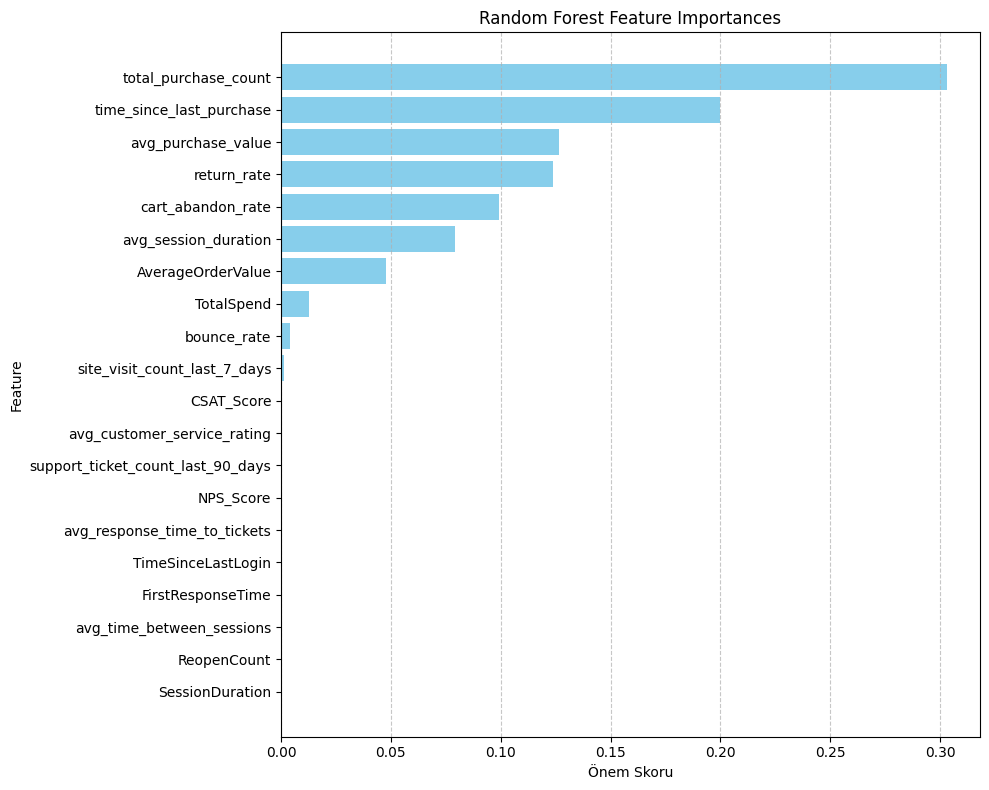

In [49]:
best_model = results['best_model']

# Feature importances varsa al
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_

    # Feature isimlerini almak için
    high_corr_features = [
        'cart_abandon_rate','time_since_last_purchase','return_rate',
        'bounce_rate','avg_response_time_to_tickets','avg_time_between_sessions',
        'TimeSinceLastLogin'
    ]
    medium_corr_features = [
        'support_ticket_count_last_90_days','FirstResponseTime','ReopenCount',
        'avg_customer_service_rating','CSAT_Score','SessionDuration',
        'avg_session_duration'
    ]
    low_medium_features = [
        'site_visit_count_last_7_days','AverageOrderValue','total_purchase_count',
        'avg_purchase_value','TotalSpend','NPS_Score'
    ]
    all_features = high_corr_features + medium_corr_features + low_medium_features

    import pandas as pd
    feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Çubuk grafiği
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Önem Skoru')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)